***Author: Tejaswini Patil***\
***Reg No: 20MAI0044***
### Stochastic Gradient Descent

In [1]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

### Data preparation

In [2]:
# import iris data
iris = datasets.load_iris()

# Consider only first two features for this demo
X = iris.data[:, :2]
y = iris.target
colors = "bry"

### Shuffle the data

In [3]:
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

### Standardize the data

In [4]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

### Deciding the step size

In [5]:
h = 0.02

### Classifier

In [6]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

### Mesh for plotting the points

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

### Plot the decision boundary

(-2.8700241338470187, 3.489975866152987, -3.433947141908086, 4.086052858091921)

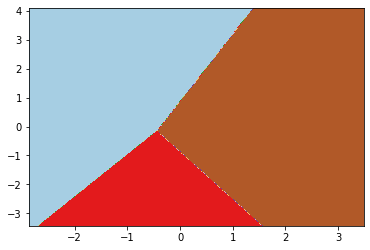

In [8]:
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

(-2.0881263006455915,
 2.7101213689230006,
 -2.7101832614184618,
 3.367011367809805)

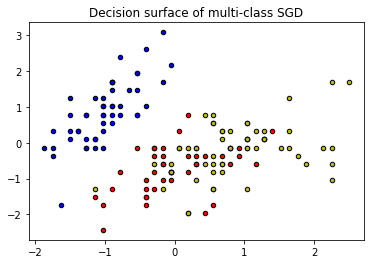

In [9]:
# We'll plot the training points as well
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

No handles with labels found to put in legend.


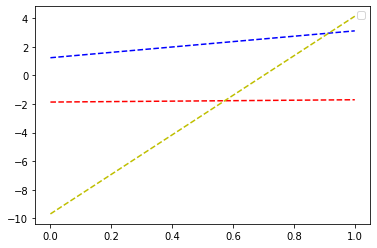

In [10]:
# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()